# Data Preparation

Redo data prep in this script 

In [1]:
import pandas as pd
import rdata
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from random import sample
from IPython.display import Markdown
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [2]:
path_l2_trimmed = r"../data/version 1.1/primary data/eye tracking data/joint_data_l2_trimmed.rda"
l2_trimmed_parsed = rdata.parser.parse_file(path_l2_trimmed)
l2_trimmed_converted = rdata.conversion.convert(l2_trimmed_parsed)
original_df = l2_trimmed_converted['joint.data']
original_df

,subid,trialid,trialnum,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,reread,nfix,refix,reg.in,reg.out,dur,firstrun.skip,firstrun.nfix,firstrun.refix,firstrun.reg.in,firstrun.reg.out,firstrun.dur,firstrun.gopast,firstrun.gopast.sel,firstfix.sac.in,firstfix.sac.out,firstfix.launch,firstfix.land,firstfix.cland,firstfix.dur,singlefix,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,uniform_id
1,DU_04,1,1.0,1,1.0,6.0,141.0,he,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,464.0,1.0,1.0,0.0,1.0,0.0,278.0,0.0,0.0,-3,3,-5.0,2.0,0.5,278.0,1.0,-3,3,-5.0,2.0,0.5,278.0,du,None,du_4
2,DU_04,1,1.0,1,1.0,6.0,142.0,gave,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,480.0,0.0,1.0,0.0,0.0,1.0,164.0,944.0,480.0,11,-3,9.0,2.0,-0.5,164.0,1.0,11,-3,9.0,2.0,-0.5,164.0,du,None,du_4
3,DU_04,1,1.0,1,1.0,6.0,143.0,up,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155.0,0.0,1.0,0.0,0.0,0.0,155.0,155.0,155.0,6,6,6.0,0.0,-1.5,155.0,1.0,6,6,6.0,0.0,-1.5,155.0,du,None,du_4
4,DU_04,1,1.0,1,1.0,6.0,144.0,painting,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,323.0,0.0,1.0,0.0,0.0,0.0,323.0,323.0,323.0,6,10,3.0,3.0,-1.5,323.0,1.0,6,10,3.0,3.0,-1.5,323.0,du,None,du_4
5,DU_04,1,1.0,1,1.0,6.0,145.0,and,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648,-2147483648,NaN,NaN,NaN,NaN,0.0,-2147483648,-2147483648,NaN,NaN,NaN,NaN,du,None,du_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669949,tr_52,12,12.0,12,1.0,5.0,144.0,their,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,354.0,1.0,1.0,0.0,0.0,0.0,197.0,0.0,0.0,9,6,6.0,3.0,0.0,197.0,1.0,9,6,6.0,3.0,0.0,197.0,tr,None,tr_52
669950,tr_52,12,12.0,12,1.0,5.0,145.0,connectivity,0.0,0.0,3.0,1.0,4.0,1.0,1.0,1.0,872.0,1.0,1.0,0.0,0.0,0.0,222.0,0.0,0.0,6,13,3.0,3.0,-3.5,222.0,1.0,6,13,3.0,3.0,-3.5,222.0,tr,None,tr_52
669951,tr_52,12,12.0,12,1.0,5.0,146.0,in,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,220.0,1.0,1.0,0.0,0.0,0.0,220.0,0.0,0.0,9,5,9.0,0.0,-1.5,220.0,1.0,9,5,9.0,0.0,-1.5,220.0,tr,None,tr_52
669952,tr_52,12,12.0,12,1.0,5.0,147.0,personal,0.0,0.0,2.0,1.0,4.0,1.0,0.0,1.0,661.0,1.0,1.0,0.0,0.0,1.0,233.0,0.0,0.0,13,-11,13.0,0.0,-4.5,233.0,1.0,13,-11,13.0,0.0,-4.5,233.0,tr,None,tr_52


In [3]:
df = original_df

In [4]:
df.columns

Index(['subid', 'trialid', 'trialnum', 'itemid', 'cond', 'sentnum', 'ianum',
       'ia', 'blink', 'skip', 'nrun', 'reread', 'nfix', 'refix', 'reg.in',
       'reg.out', 'dur', 'firstrun.skip', 'firstrun.nfix', 'firstrun.refix',
       'firstrun.reg.in', 'firstrun.reg.out', 'firstrun.dur',
       'firstrun.gopast', 'firstrun.gopast.sel', 'firstfix.sac.in',
       'firstfix.sac.out', 'firstfix.launch', 'firstfix.land',
       'firstfix.cland', 'firstfix.dur', 'singlefix', 'singlefix.sac.in',
       'singlefix.sac.out', 'singlefix.launch', 'singlefix.land',
       'singlefix.cland', 'singlefix.dur', 'lang', 'trial', 'uniform_id'],
      dtype='object')

## Selection of First Pass duration (FP):
Time spent from first entering a word to first leaving it (including re-fixations within the word).


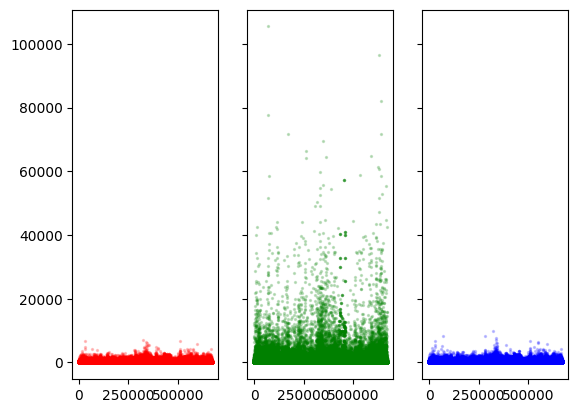

In [5]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].scatter(df.index, df["firstrun.dur"], s=2, color = "red", alpha=0.2)
ax[1].scatter(df.index, df["firstrun.gopast"], s=2, color = "green", alpha=0.2)
ax[2].scatter(df.index, df["firstrun.gopast.sel"], s=2, color = "blue", alpha=0.2)
plt.show()

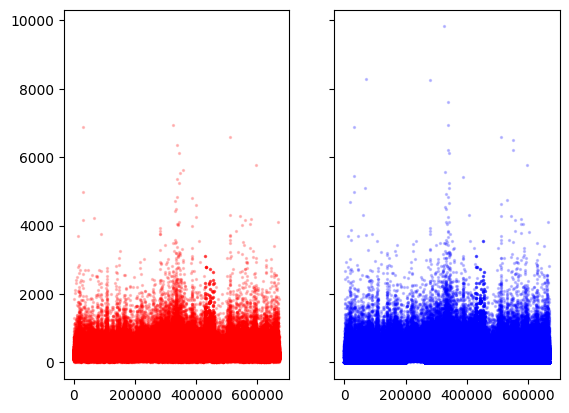

In [6]:
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].scatter(df.index, df["firstrun.dur"], s=2, color = "red", alpha=0.2)
ax[1].scatter(df.index, df["firstrun.gopast.sel"], s=2, color = "blue", alpha=0.2)
plt.show()

In [7]:
df["firstrun.dur"].describe()

count    505043.000000
mean        290.402588
std         196.419997
min           2.000000
25%         178.000000
50%         241.000000
75%         343.000000
max        6932.000000
Name: firstrun.dur, dtype: float64

In [8]:
df["firstrun.gopast.sel"].describe()

count    505043.000000
mean        268.020836
std         247.274139
min           0.000000
25%         140.000000
50%         232.000000
75%         356.000000
max        9823.000000
Name: firstrun.gopast.sel, dtype: float64

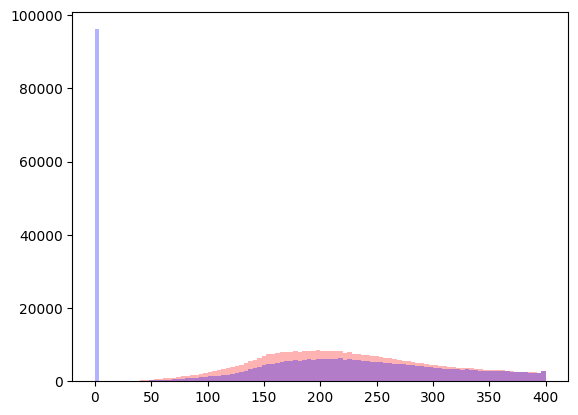

In [9]:
dur_cnt, dur_bins = np.histogram(df["firstrun.dur"], bins=100, range=(0, 400))
sel_cnt, sel_bins = np.histogram(df["firstrun.gopast.sel"], bins=100, range=(0, 400))

plt.hist(dur_bins[:-1], dur_bins, weights=dur_cnt, color="red", alpha=0.3)
plt.hist(sel_bins[:-1], sel_bins, weights=sel_cnt, color="blue", alpha=0.3)
plt.show()

## Validation of chosen matrics

In [10]:
tmp = df[["firstfix.dur", "firstrun.dur", "dur"]]

In [11]:
tmp[tmp["firstfix.dur"] > tmp["firstrun.dur"]]  #should be empty

,firstfix.dur,firstrun.dur,dur


In [12]:
tmp[tmp["firstrun.dur"] > tmp["dur"]]  #should be empty

,firstfix.dur,firstrun.dur,dur


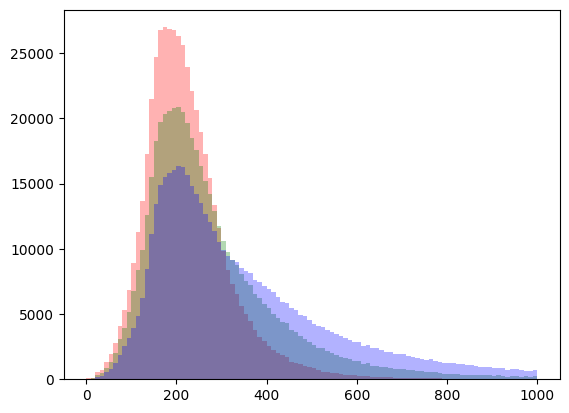

In [13]:
FF_cnt, FF_bins = np.histogram(df["firstfix.dur"], bins=100, range=(0, 1000))
FP_cnt, FP_bins = np.histogram(df["firstrun.dur"], bins=100, range=(0, 1000))
TF_cnt, TF_bins = np.histogram(df["dur"], bins=100, range=(0, 1000))

plt.hist(FF_bins[:-1], FF_bins, weights=FF_cnt, color="red", alpha=0.3)
plt.hist(FP_bins[:-1], FP_bins, weights=FP_cnt, color="green", alpha=0.3)
plt.hist(TF_bins[:-1], TF_bins, weights=TF_cnt, color="blue", alpha=0.3)
plt.show()

First Fixation duration (FF) Duration of the first fixation on a word\
-> firstfix.dur: Duration of the first fixation on the word (first fixation duration)

First Pass duration (FP) Time spent from first entering a word to first leaving it (including re-fixations within the word)\
-> firstrun.dur: Time the word was read during first-pass reading (gaze duration)

Total Fixation duration (TF) The sum of all fixation times on a word\
-> dur: Total time the word was read during the trial in ms (total reading time)

## Data preparation

In [14]:
df.head()

,subid,trialid,trialnum,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,reread,nfix,refix,reg.in,reg.out,dur,firstrun.skip,firstrun.nfix,firstrun.refix,firstrun.reg.in,firstrun.reg.out,firstrun.dur,firstrun.gopast,firstrun.gopast.sel,firstfix.sac.in,firstfix.sac.out,firstfix.launch,firstfix.land,firstfix.cland,firstfix.dur,singlefix,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,uniform_id
1,DU_04,1,1.0,1,1.0,6.0,141.0,he,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,464.0,1.0,1.0,0.0,1.0,0.0,278.0,0.0,0.0,-3,3,-5.0,2.0,0.5,278.0,1.0,-3,3,-5.0,2.0,0.5,278.0,du,None,du_4
2,DU_04,1,1.0,1,1.0,6.0,142.0,gave,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,480.0,0.0,1.0,0.0,0.0,1.0,164.0,944.0,480.0,11,-3,9.0,2.0,-0.5,164.0,1.0,11,-3,9.0,2.0,-0.5,164.0,du,None,du_4
3,DU_04,1,1.0,1,1.0,6.0,143.0,up,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155.0,0.0,1.0,0.0,0.0,0.0,155.0,155.0,155.0,6,6,6.0,0.0,-1.5,155.0,1.0,6,6,6.0,0.0,-1.5,155.0,du,None,du_4
4,DU_04,1,1.0,1,1.0,6.0,144.0,painting,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,323.0,0.0,1.0,0.0,0.0,0.0,323.0,323.0,323.0,6,10,3.0,3.0,-1.5,323.0,1.0,6,10,3.0,3.0,-1.5,323.0,du,None,du_4
5,DU_04,1,1.0,1,1.0,6.0,145.0,and,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648,-2147483648,NaN,NaN,NaN,NaN,0.0,-2147483648,-2147483648,NaN,NaN,NaN,NaN,du,None,du_4


In [15]:
def id_pivot(df):
    df = df[["uniform_id","itemid"]].drop_duplicates()
    df["dummy"] = 1
    df = df.pivot(index="uniform_id", columns="itemid", values="dummy")
    return df
    
id_pivot(df).describe().loc[["count"]]

itemid,1,10,11,12,2,3,4,5,6,7,8,9
count,422.0,388.0,384.0,365.0,430.0,436.0,408.0,382.0,375.0,384.0,399.0,399.0


There is no text, which is read by all (543) participants.

In [16]:
def people_by_language(df):
    return df[["lang", "uniform_id"]].drop_duplicates().groupby("lang").count()
people_by_language(df).transpose()

lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,47,58,45,51,45,48,45,51,40,47,41,25


To find out which texts we may drop. "Criteria" function allows us to change the minimal number of languages we want to have in final dataframe and number of participants per language.

In [17]:
def filter_by_texts_count(df, N):
    # leave only people who read more N texts
    texts_per_person = id_pivot(df).count(axis=1)
    participants = texts_per_person[texts_per_person == N].index.values.__array__()
    df = df[df.uniform_id.isin(participants)]
    return df

def filter_by_text(df, text_list):
    # Remove entries with texts from list and leave only people who
    # read all remaining texts
    df = df[~ df.itemid.isin(text_list)]
    df = filter_by_texts_count(df, 12-len(text_list))
    return df

def criteria(df, languages, group_size):
    df = df[df.uniform_id >= group_size]
    count = int(df.count())
    return count >= languages

In [18]:
from IPython.display import Markdown

def greedy_exploration(df, min_tuple, max_tuple, min_languages, min_group_size, min_words):
    sizes_of_tuples = list(range(min_tuple, max_tuple+1))
    for tuple_size in sizes_of_tuples:  
        tuples_to_test = list(combinations(df.itemid.unique(), tuple_size))
        for t in tuples_to_test:
            df1 = filter_by_text(df, t)
            df2 = people_by_language(df1)
            words = len(df1[["itemid", "sentnum", "ianum"]].drop_duplicates())


            if criteria(df2, min_languages, min_group_size) and words >= min_words:
                display(Markdown('---'))
                print(f'Dropped texts: {t}')
                print(f'Words count: {words}')
                display(df2.transpose())

In [19]:
# greedy_exploration(original_df, 6, 8, 6, 18, 680)

## Dataframe modification

In [20]:
# texts_to_drop = ('10', '11', '12', '6', '9', '7', '8') #Words count: 782
texts_to_drop = ('2', '10', '11', '12', '6', '9', '7', '8') #Words count: 684
df = original_df
df = filter_by_text(original_df, texts_to_drop)
df = df[["uniform_id", "lang", "itemid", "sentnum", "ianum", "ia", "skip", "dur", "firstrun.dur", "firstfix.dur"]]
df = df.rename(columns={"dur":"TF", "firstfix.dur":"FF", "firstrun.dur":"FP"})
df.head()

,uniform_id,lang,itemid,sentnum,ianum,ia,skip,TF,FP,FF
2006,du_6,du,1,1.0,1.0,Samuel,0.0,209.0,26.0,26.0
2007,du_6,du,1,1.0,2.0,"Morse,",0.0,146.0,146.0,146.0
2008,du_6,du,1,1.0,3.0,best,0.0,166.0,166.0,166.0
2009,du_6,du,1,1.0,4.0,known,0.0,372.0,201.0,201.0
2010,du_6,du,1,1.0,5.0,today,0.0,234.0,234.0,234.0


In [21]:
# total sentence reading time
total_sentence_readtime = df.groupby(['uniform_id', 'itemid', 'sentnum'])['TF'].sum().reset_index()
total_sentence_readtime = total_sentence_readtime.rename(columns = {'TF':'total_dur'})
df = df.merge(total_sentence_readtime, on = ['uniform_id', 'itemid', 'sentnum'], how = 'left')
df['FF'] = df['FF'] / df['total_dur'] 
df['FP'] = df['FP'] / df['total_dur']
df['TF'] = df['TF'] / df['total_dur']
df = df.drop(["total_dur"], axis=1)
df

,uniform_id,lang,itemid,sentnum,ianum,ia,skip,TF,FP,FF
0,du_6,du,1,1.0,1.0,Samuel,0.0,0.032872,0.004089,0.004089
1,du_6,du,1,1.0,2.0,"Morse,",0.0,0.022963,0.022963,0.022963
2,du_6,du,1,1.0,3.0,best,0.0,0.026109,0.026109,0.026109
3,du_6,du,1,1.0,4.0,known,0.0,0.058509,0.031614,0.031614
4,du_6,du,1,1.0,5.0,today,0.0,0.036804,0.036804,0.036804
...,...,...,...,...,...,...,...,...,...,...
143275,tr_48,tr,5,10.0,183.0,is,0.0,0.089789,0.089789,0.089789
143276,tr_48,tr,5,10.0,184.0,worth,1.0,NaN,NaN,NaN
143277,tr_48,tr,5,10.0,185.0,the,0.0,0.079062,0.079062,0.079062
143278,tr_48,tr,5,10.0,186.0,added,0.0,0.148590,0.091379,0.091379


In [22]:
df[(df.skip == 0) & (df.TF.isna())] #should be empty

,uniform_id,lang,itemid,sentnum,ianum,ia,skip,TF,FP,FF


In [23]:
df = df.fillna({"FF":0, "FP":0, "TF":0})

## Limiting overrepresented languages

In [24]:
people_by_language(df).transpose()

lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,11,35,21,42,23,13,18,20,14,12,21,10


In [25]:
for language in ["ee", "fi"]:
    lang_participants = df[df.lang == language].uniform_id.unique().__array__().tolist()
    number_to_drop = len(lang_participants) - 23
    participants_to_drop = sample(lang_participants, number_to_drop)
    df = df[~df.uniform_id.isin(participants_to_drop)]

people_by_language(df).transpose()

lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,11,23,21,23,23,13,18,20,14,12,21,10


## Final dataframe

In [26]:
languages_selected = ("ee", "en", "fi", "ge", "he", "it", "sp")
df = df[df.lang.isin(languages_selected)].reset_index(drop=True)
df["ia_id"] = df.apply(lambda row: f"{row['itemid']}_{str(int(row['ianum'])).rjust(4, '0')}_{row['ia']}", axis=1)

df_sentnum = df[["ia_id", "sentnum"]].groupby(by="ia_id").min().reset_index()
df = df.drop(columns="sentnum").merge(df_sentnum, on="ia_id")

df = df[["lang", "uniform_id", "itemid", "sentnum", "ianum", "ia", "ia_id", "TF", "FP", "FF"]].sort_values(["lang", "uniform_id", "ia_id"]).reset_index(drop=True)
df

,lang,uniform_id,itemid,sentnum,ianum,ia,ia_id,TF,FP,FF
0,ee,ee_1,1,1.0,1.0,Samuel,1_0001_Samuel,0.059849,0.059849,0.023100
1,ee,ee_1,1,1.0,2.0,"Morse,","1_0002_Morse,",0.044309,0.044309,0.044309
2,ee,ee_1,1,1.0,3.0,best,1_0003_best,0.000000,0.000000,0.000000
3,ee,ee_1,1,1.0,4.0,known,1_0004_known,0.043049,0.043049,0.043049
4,ee,ee_1,1,1.0,5.0,today,1_0005_today,0.045359,0.045359,0.045359
...,...,...,...,...,...,...,...,...,...,...
88948,sp,sp_8,5,10.0,183.0,is,5_0183_is,0.041431,0.041431,0.041431
88949,sp,sp_8,5,10.0,184.0,worth,5_0184_worth,0.039612,0.039612,0.039612
88950,sp,sp_8,5,10.0,185.0,the,5_0185_the,0.000000,0.000000,0.000000
88951,sp,sp_8,5,10.0,186.0,added,5_0186_added,0.150566,0.103274,0.051738


In [29]:
df_pivot = df.pivot(index="uniform_id", columns=["ia_id"], values=["TF", "FP", "FF"])
df_pivot

TF                                                      \
ia_id      1_0001_Samuel 1_0002_Morse, 1_0003_best 1_0004_known 1_0005_today   
uniform_id                                                                     
ee_1            0.059849      0.044309    0.000000     0.043049     0.045359   
ee_12           0.147014      0.099674    0.000000     0.128339     0.000000   
ee_16           0.011184      0.080913    0.000000     0.032350     0.012084   
ee_19           0.072944      0.062334    0.065539     0.038904     0.057250   
ee_2            0.055410      0.071429    0.029421     0.038411     0.049689   
...                  ...           ...         ...          ...          ...   
sp_59           0.037090      0.119646    0.000000     0.038526     0.044030   
sp_60           0.102214      0.132472    0.067343     0.011624     0.049446   
sp_62           0.019022      0.306141    0.034725     0.080684     0.000000   
sp_63           0.040285      0.080699    0.000000     0.067617     0.052461   
sp_8            0.063789      0.029986    0.037892     0.134848     0.063062   

                                                                        \
ia_id      1_0006_as 1_0007_the 1_0008_inventor 1_0009_of 1_0010_Morse   
uniform_id                                                               
ee_1        0.000000   0.049769        0.043679  0.028139     0.041789   
ee_12       0.000000   0.000000        0.062975  0.000000     0.049077   
ee_16       0.012009   0.024469        0.046386  0.000000     0.052616   
ee_19       0.035146   0.052940        0.040893  0.018015     0.069297   
ee_2        0.028114   0.000000        0.081890  0.000000     0.043969   
...              ...        ...             ...       ...          ...   
sp_59       0.000000   0.044269        0.045944  0.000000     0.054798   
sp_60       0.000000   0.031365        0.061255  0.000000     0.044834   
sp_62       0.037278   0.027703        0.048130  0.023235     0.024001   
sp_63       0.000000   0.027850        0.111788  0.024093     0.166580   
sp_8        0.000000   0.019355        0.055248  0.000000     0.054612   

                                                                   \
ia_id      1_0011_Code 1_0012_and 1_0013_one 1_0014_of 1_0015_the   
uniform_id                                                          
ee_1          0.000000   0.040739   0.049349  0.000000   0.039899   
ee_12         0.031488   0.000000   0.000000  0.046037   0.036265   
ee_16         0.037079   0.022367   0.015012  0.000000   0.016138   
ee_19         0.085875   0.000000   0.010942  0.000000   0.016468   
ee_2          0.062439   0.000000   0.000000  0.000000   0.050997   
...                ...        ...        ...       ...        ...   
sp_59         0.043073   0.000000   0.068677  0.000000   0.033501   
sp_60         0.051107   0.000000   0.019188  0.034502   0.000000   
sp_62         0.030640   0.035363   0.024129  0.000000   0.000000   
sp_63         0.019819   0.000000   0.000000  0.000000   0.035104   
sp_8          0.036801   0.013812   0.031622  0.000000   0.016084   

                                                                               \
ia_id      1_0016_inventors 1_0017_of 1_0018_the 1_0019_telegraph, 1_0020_was   
uniform_id                                                                      
ee_1               0.034649  0.039689   0.049139          0.051029   0.019110   
ee_12              0.019110  0.000000   0.000000          0.087296   0.000000   
ee_16              0.098401  0.015762   0.035427          0.262929   0.034302   
ee_19              0.034151  0.015363   0.000000          0.034593   0.021662   
ee_2               0.097581  0.000000   0.024845          0.053449   0.114090   
...                     ...       ...        ...               ...        ...   
sp_59              0.046423  0.000000   0.000000          0.127542   0.067959   
sp_60              0.046679  0.000000   0.000000          0.089299   0.040959   
sp_62 

In [30]:
df.to_pickle("../data/df.pickle")
df_pivot.to_pickle("../data/df_pivoted.pickle")

In [31]:
df_annotation = df[["ia_id", "ia", "itemid", "sentnum", "ianum"]].drop_duplicates().reset_index(drop=True)
df_annotation[["ia_id"]].to_pickle("../data/df_indexes.pickle")
                              
df_annotation[["itemid", "sentnum", "ianum"]] = df_annotation[["itemid", "sentnum", "ianum"]].astype(int)
df_annotation = df_annotation.drop(columns="ia_id")
df_annotation = df_annotation.rename(columns={"ia":"interest_area", "itemid":"text_num", "sentnum":"sentence_num", "ianum":"interest_area_num"})
df_annotation.to_pickle("../data/df_annotation.pickle")